BEML DataFrame:
                  Date    Close
Date                           
2010-01-04  2010-01-04  1135.60
2010-01-05  2010-01-05  1134.60
2010-01-06  2010-01-06  1139.60
2010-01-07  2010-01-07  1144.15
2010-01-08  2010-01-08  1144.05

Glaxo DataFrame:
                  Date    Close
Date                           
2010-01-04  2010-01-04  1625.65
2010-01-05  2010-01-05  1616.80
2010-01-06  2010-01-06  1638.50
2010-01-07  2010-01-07  1648.70
2010-01-08  2010-01-08  1639.80


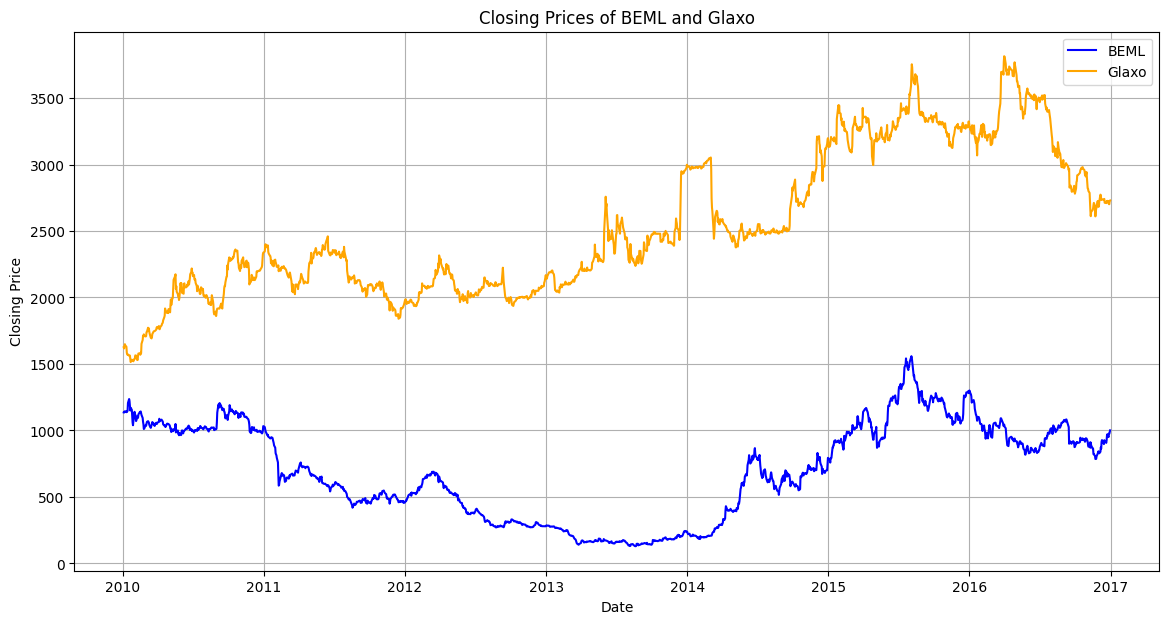


BEML Percentage Change:
                  Date    Close  Pct_Change
Date                                       
2010-01-05  2010-01-05  1134.60   -0.088059
2010-01-06  2010-01-06  1139.60    0.440684
2010-01-07  2010-01-07  1144.15    0.399263
2010-01-08  2010-01-08  1144.05   -0.008740
2010-01-11  2010-01-11  1137.00   -0.616232

Glaxo Percentage Change:
                  Date    Close  Pct_Change
Date                                       
2010-01-05  2010-01-05  1616.80   -0.544398
2010-01-06  2010-01-06  1638.50    1.342157
2010-01-07  2010-01-07  1648.70    0.622521
2010-01-08  2010-01-08  1639.80   -0.539819
2010-01-11  2010-01-11  1629.45   -0.631175


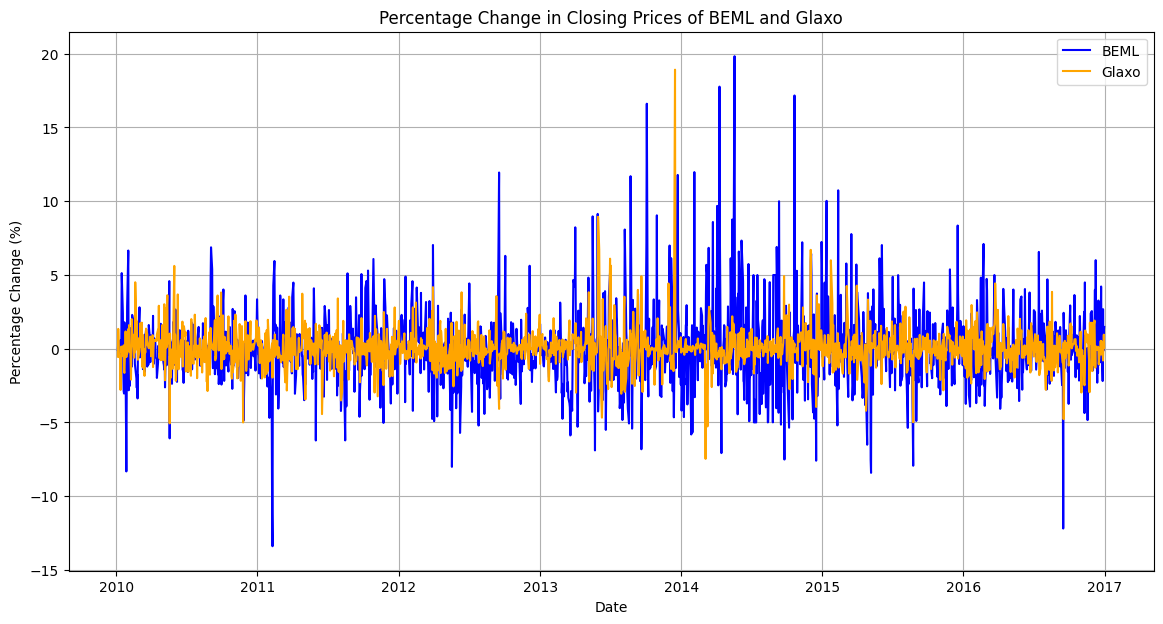

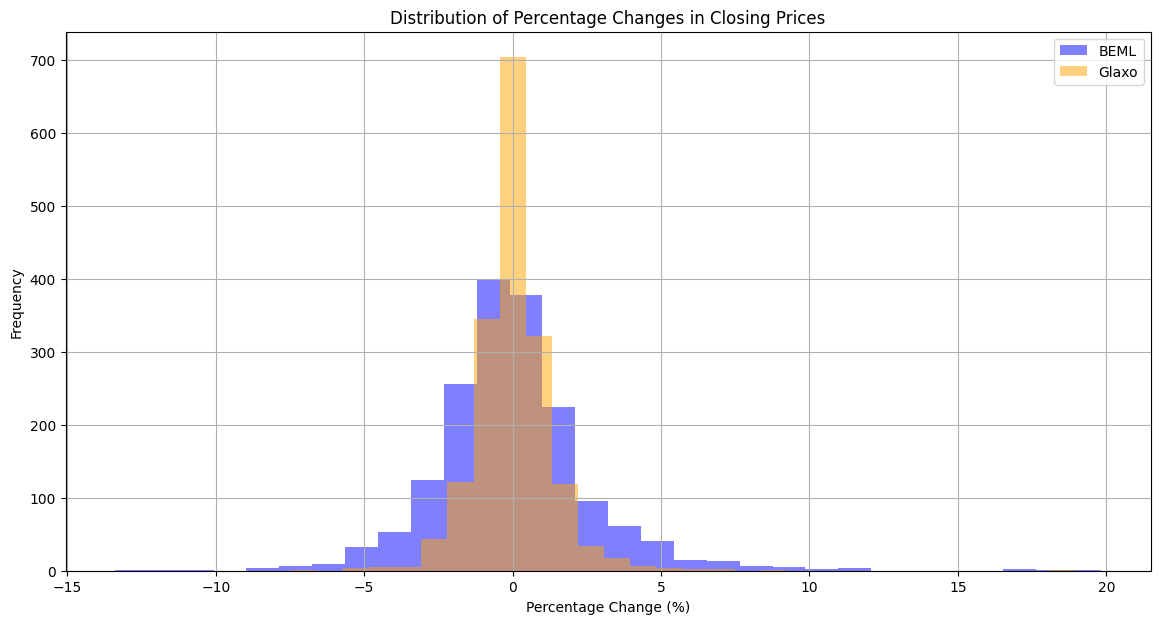

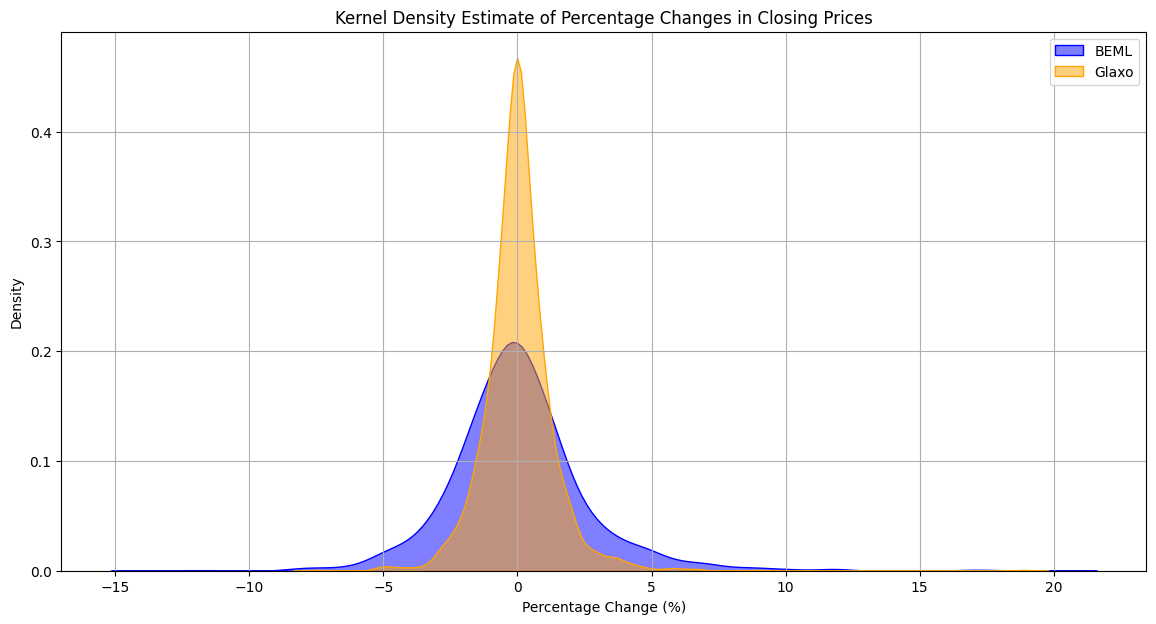


BEML Mean Percentage Change: 0.0271
BEML Standard Deviation of Percentage Change: 2.6431

Glaxo Mean Percentage Change: 0.0386
Glaxo Standard Deviation of Percentage Change: 1.3361


In [ ]:
import pandas as pd
df_beml = pd.read_csv('beml.csv')
df_glaxo = pd.read_csv('glaxo.csv')



# Drop all the columns except Date and Closing Price
df_beml = df_beml[['Date', 'Close']]
df_glaxo = df_glaxo[['Date', 'Close']]


# Create a datetime index from the Date column
df_beml = df_beml.set_index(pd.to_datetime(df_beml['Date']))
df_glaxo = df_glaxo.set_index(pd.to_datetime(df_glaxo['Date']))

# Display the first few rows of each DataFrame
print("BEML DataFrame:")
print(df_beml.head())
print("\nGlaxo DataFrame:")
print(df_glaxo.head())

# Plot the trend of close prices for both companies
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7))
plt.plot(df_beml.index, df_beml['Close'], label='BEML', color='blue')
plt.plot(df_glaxo.index, df_glaxo['Close'], label='Glaxo', color='orange')
plt.title('Closing Prices of BEML and Glaxo')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid()
plt.show()

# Calculate the percentage change in closing prices
df_beml['Pct_Change'] = df_beml['Close'].pct_change(periods = 1) * 100
# Drop the NaN values that result from the Pct_Change column
df_beml.dropna(inplace=True)
df_glaxo['Pct_Change'] = df_glaxo['Close'].pct_change(periods = 1) * 100
# Drop the NaN values that result from the Pct_Change column
df_glaxo.dropna(inplace=True)
# Display the percentage change for both DataFrames
print("\nBEML Percentage Change:")
print(df_beml.head())
print("\nGlaxo Percentage Change:")
print(df_glaxo.head())


# Plot the percentage change in closing prices
plt.figure(figsize=(14, 7))
plt.plot(df_beml.index, df_beml['Pct_Change'], label='BEML', color='blue')
plt.plot(df_glaxo.index, df_glaxo['Pct_Change'], label='Glaxo', color='orange')
plt.title('Percentage Change in Closing Prices of BEML and Glaxo')
plt.xlabel('Date')
plt.ylabel('Percentage Change (%)')
plt.legend()
plt.grid()
plt.show()


# Plot the distribution of percentage changes
plt.figure(figsize=(14, 7))
plt.hist(df_beml['Pct_Change'], bins=30, alpha=0.5, label='BEML', color='blue')
plt.hist(df_glaxo['Pct_Change'], bins=30, alpha=0.5, label='Glaxo', color='orange')
plt.title('Distribution of Percentage Changes in Closing Prices')
plt.xlabel('Percentage Change (%)')
plt.ylabel('Frequency')
plt.legend()
plt.grid()
plt.show()

# Plot the distribution plot of percentage changes
import seaborn as sns
plt.figure(figsize=(14, 7))
sns.kdeplot(df_beml['Pct_Change'], label='BEML', color='blue', fill=True, alpha=0.5)
sns.kdeplot(df_glaxo['Pct_Change'], label='Glaxo', color='orange', fill=True, alpha=0.5)
plt.title('Kernel Density Estimate of Percentage Changes in Closing Prices')
plt.xlabel('Percentage Change (%)')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()

# Calculate the mean and standard deviation of percentage changes and round the mean to 4 decimal places
mean_beml = df_beml['Pct_Change'].mean().round(4)
mean_glaxo = df_glaxo['Pct_Change'].mean().round(4)
std_beml = df_beml['Pct_Change'].std().round(4)
std_glaxo = df_glaxo['Pct_Change'].std().round(4)
# Display the mean and standard deviation
print("\nBEML Mean Percentage Change:", mean_beml)
print("BEML Standard Deviation of Percentage Change:", std_beml)
print("\nGlaxo Mean Percentage Change:", mean_glaxo)
print("Glaxo Standard Deviation of Percentage Change:", std_glaxo)


# Find out the expected range of returns for both companies in 95% of the cases. Use scipy.stats.norm.interval rounded to 4 decimal places.
from scipy import stats
import numpy as np
confidence_level = 0.95
interval_beml = stats.norm.interval(confidence_level, loc=mean_beml, scale=std_beml)
interval_glaxo = stats.norm.interval(confidence_level, loc=mean_glaxo, scale=std_glaxo)

# Display the expected range of returns
print("\nExpected Range of Returns for BEML (95% confidence):", np.round(interval_beml, 4))
print("Expected Range of Returns for Glaxo (95% confidence):", np.round(interval_glaxo,4))




